In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
%matplotlib inline 
import seaborn as sns 
df_listings=pd.read_csv('df_listings.csv')

In [2]:
## Select data of properties within 10km from Victoria Art Museum
from folium.plugins import FastMarkerCluster

In [3]:
# draw maps
lats2018 = df_listings['latitude'].tolist()
lons2018 = df_listings['longitude'].tolist()
locations = list(zip(lats2018, lons2018))
import folium as fo
map1 = fo.Map(location=[-37.82,144.96], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

#经纬度 · 37°49′21″S 144°58′07″E﻿ / ﻿37.822595°S 144.968634°E﻿ / -37.822595; 144.968634 ; 


In [4]:
# draw maps 5km
destination = [-37.82, 144.96] #latitude, longitude
lats = df_listings['latitude'].tolist()
lons = df_listings['longitude'].tolist()
locations = list(zip(lats, lons))
import folium
map1 = folium.Map(location=destination, zoom_start=11.5)
folium.Circle(radius=5000,location=destination, color="black", fill=False).add_to(map1)
FastMarkerCluster(data=locations).add_to(map1)
map1

In [5]:
import numpy as np
from math import *

In [6]:
# # calculate distance
# #a=np.sin(float(df_listings['latitude']))
# df_listings['distance']=2*6371*np.arcsin(np.sqrt(np.sin((df_listings['latitude']+37.82)/2)**2+np.cos('latitude')*np.cos('latitude')*(np.sin((df_listings['longitude']-144.96)/2)**2)))
df=df_listings
df['distance']=2*6371*(
    (
        ((df['latitude'] + 37.82) / 2).apply(sin)**2 +
        (df['latitude']).apply(cos) * (df['latitude']).apply(cos) * (((df['longitude']-144.96)/2).apply(sin)**2)
     ).apply(sqrt)
).apply(asin)

In [7]:
df_listings.shape

(4696, 64)

In [8]:
# Select properties within 10km of the Victoria Art Museum
#df_listings=df[(df['distance']<10)&(df['review_scores_avg6']>2)]
#df[df['distance']<100].shape
df_listings[df_listings['review_scores_avg6']>8].shape

(4623, 64)

In [9]:
df_listings[df_listings['distance']<100].shape

(1331, 64)

In [10]:
df_listings=df[(df['distance']<100)&(df['review_scores_avg6']>8)]

In [11]:
df_listings.shape

(1308, 64)

In [12]:
df_listings['host_name'].nunique()

396

In [13]:
# top host
listings_name = df_listings.groupby(['name'])['profit_per_month','reviews_per_month'].mean()

<ipython-input-13-c774d9c6ded2>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  listings_name = df_listings.groupby(['name'])['profit_per_month','reviews_per_month'].mean()


In [34]:
listings_name.to_csv("listings_name")

<ipython-input-14-6b9a0b4ec1ab>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rank_data = df_listings.groupby(['host_name'])['profit_per_month','reviews_per_month'].apply(sum)


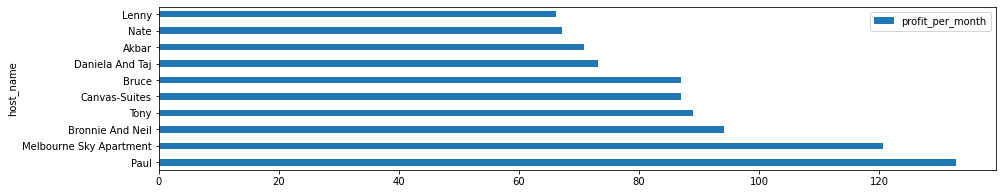

In [14]:
# top host
rank_data = df_listings.groupby(['host_name'])['profit_per_month','reviews_per_month'].apply(sum)
rank_data = rank_data.sort_values('profit_per_month', ascending=False)
rank_data.iloc[:10,:1].plot.barh(figsize=(15, 3), width=0.4)
plt.show()

In [15]:
rank_data.shape

(396, 2)

In [16]:
rank_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, Paul to Julian
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   profit_per_month   396 non-null    float64
 1   reviews_per_month  396 non-null    float64
dtypes: float64(2)
memory usage: 9.3+ KB


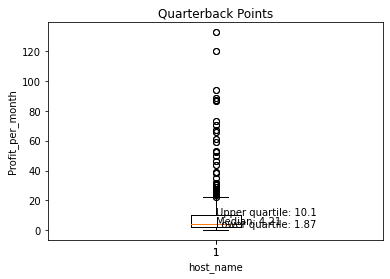

In [17]:
# Calculate the median
points = rank_data.profit_per_month


# Create a figure and axes
fig, ax = plt.subplots()

# Create a boxplot of the data
ax.boxplot(points)

# Set the x-axis label
ax.set_xlabel('host_name')

# Set the y-axis label
ax.set_ylabel('Profit_per_month')

# Set the title
ax.set_title('Quarterback Points')

# Create a boxplot of the data
plt.boxplot(points) 

# Calculate the median, lower quartile, and upper quartile
median = np.median(points)
lower_quartile = np.percentile(points, 25)
upper_quartile = np.percentile(points, 75)

# Add text to the plot showing the critical indicators
plt.text(1, median, 'Median: {:.3}'.format(median))
plt.text(1, lower_quartile, 'Lower quartile: {:.3}'.format(lower_quartile))
plt.text(1, upper_quartile, 'Upper quartile: {:.3}'.format(upper_quartile))

# Show the plot
plt.show()

In [18]:
host_listings=rank_data[rank_data['profit_per_month']>10.1]

In [19]:
rank_data.columns

Index(['profit_per_month', 'reviews_per_month'], dtype='object')

In [20]:
host_listings.shape

(99, 2)

In [21]:
df_listings = pd.merge(host_listings,df_listings,how="inner",on='host_name')

In [22]:
df_listings.shape

(792, 66)

<AxesSubplot:>

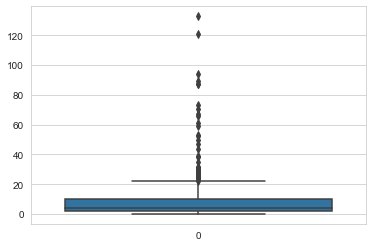

In [23]:
import seaborn as sns
sns.set_style("whitegrid")

sns.boxplot(
#     x="host_name", 
#     y="profit_per_month", 
    data=rank_data.profit_per_month)


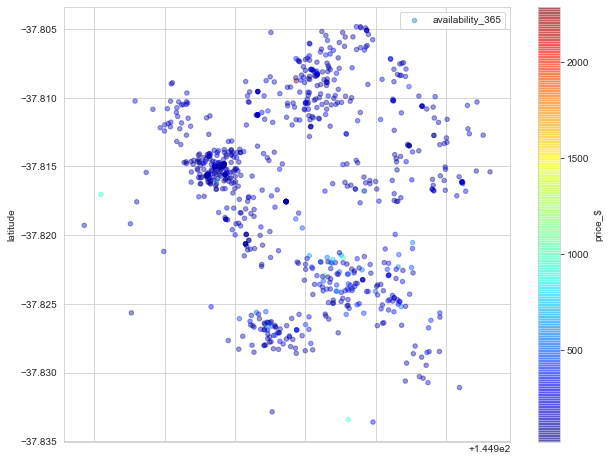

In [24]:
# let's what we can do with our given longtitude and latitude columns

# let's see how scatterplot will come out 
# we use prcie as a gradient layer, represent
viz_4=df_listings.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price_$',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

In [25]:
df_listings['name'].nunique()

774

Text(0.5, 1.0, 'Density and distribution of prices for each neighbourhood_cleansed')

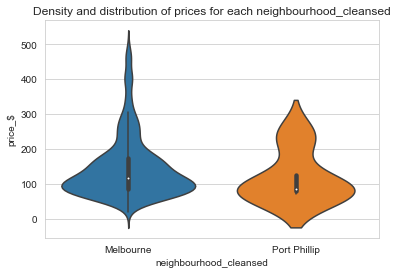

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

#we can see from our statistical table that we have some extreme values, therefore we need to remove them for the sake of a better visualization

#creating a sub-dataframe with no extreme values / less than 500
# Filter the listings in the price range of 0-500
df_listings=df_listings[df_listings['price_$'] < 500]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=df_listings, x='neighbourhood_cleansed', y='price_$')
viz_2.set_title('Density and distribution of prices for each neighbourhood_cleansed')

In [27]:
df_listings.shape

(773, 66)

In [28]:
df_listings.host_name.nunique()

98

In [29]:
df_listings.name.nunique()

755

In [30]:
df_listings.head()

,host_name,profit_per_month_x,reviews_per_month_x,Unnamed: 0,id,listing_url,scrape_id,name,description,neighborhood_overview,...,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month_y,price_$,profit_per_month_y,review_scores_avg6,distance
0,Paul,132.779761,134.95,4362,14736770,https://www.airbnb.com/rooms/14736770,20200820034003,Incredible City Views in Trendy Melbourne Bota...,ODELIA - Relax in the grounds or take a dip in...,The best part of the area is that it is so cen...,...,1,73,72,1,0,4.57,100.0,4.711340,10.000000,81.118709
1,Paul,132.779761,134.95,4388,14848971,https://www.airbnb.com/rooms/14848971,20200820034003,Bright designer CBD Pad *WIFI POOL GYM SAUNA,Zahra - an immaculate 2 bedroom CBD designer a...,The best part of the area is that it is centra...,...,1,73,72,1,0,4.60,92.0,4.362887,9.833333,45.304523
2,Paul,132.779761,134.95,4532,15211834,https://www.airbnb.com/rooms/15211834,20200820034003,Wake Up to Sweeping City Views at Beautiful Mo...,BELLE - Admire incredible views of the city fr...,"It is so central, most connected public transp...",...,1,73,72,1,0,4.21,100.0,4.340206,9.833333,56.619861
3,Paul,132.779761,134.95,9234,24379456,https://www.airbnb.com/rooms/24379456,20200820034003,"SPACIOUS, CONVENIENT, CHIC *WIFI GYM POOL PARKING","Madeline - Resort style, impeccably presented,...",The best part of the area is that it is so cen...,...,1,73,72,1,0,4.48,92.0,4.249072,9.833333,45.391459
4,Paul,132.779761,134.95,10416,27536713,https://www.airbnb.com/rooms/27536713,20200820034003,Sleek High-Rise Apartment in Southbank,Prepare breakfast in a streamlined kitchen wit...,The apartment is in a high-rise building in So...,...,1,73,72,1,0,3.98,100.0,4.145833,10.000000,44.677828


In [31]:
df_listings_com1=df_listings

In [32]:
df_listings_com1.to_csv("df_listings_com1.csv")